In [1]:
import pandas as pd

In [2]:
df_income = pd.read_csv(r"C:\train.csv")

In [3]:
df_income.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [4]:
df_income.groupby('class_of_worker').age.agg(age_max='max',
                                             age_min='min',
                                            age_mean='mean',
                                            age_count='count',
                                            )
                                              

,age_max,age_min,age_mean,age_count
class_of_worker,,,,
Federal government,90,15,42.342564,2925
Local government,90,15,41.905062,7784
Never worked,63,15,19.888383,439
Not in universe,90,0,30.512973,100245
Private,90,15,36.938954,72028
Self-employed-incorporated,90,15,45.864931,3265
Self-employed-not incorporated,90,15,44.921610,8445
State government,90,15,39.911758,4227
Without pay,77,15,38.684848,165


In [4]:
df_income.shape

(199523, 41)

In [5]:
# df_income.isnull().sum(axis=0) 
# MISSING VALUE DETECTION
df_income.isnull().sum().sort_values(ascending = False)


migration_sunbelt                   99696
migration_within_reg                99696
migration_msa                       99696
migration_reg                       99696
country_father                       6713
country_mother                       6119
country_self                         3393
hispanic_origin                       874
state_of_previous_residence           708
member_of_labor_union                   0
sex                                     0
race                                    0
major_occupation_code                   0
income_level                            0
major_industry_code                     0
full_parttime_employment_stat           0
marital_status                          0
enrolled_in_edu_inst_lastwk             0
wage_per_hour                           0
education                               0
occupation_code                         0
industry_code                           0
class_of_worker                         0
reason_for_unemployment           

In [6]:
# SELECTING ONLY MISSING VALUE COLUMNS
df_income_missing=df_income.columns[df_income.isnull().any()].tolist()
df_income_missing

['hispanic_origin',
 'state_of_previous_residence',
 'migration_msa',
 'migration_reg',
 'migration_within_reg',
 'migration_sunbelt',
 'country_father',
 'country_mother',
 'country_self']

In [7]:
df_income_num=df_income.select_dtypes(include=['int64','float64']).columns
df_income_num=df_income[df_income_num]
# df_income_few_num= df_income_few.select_dtypes(include=['int64', 'float64']).columns
df_income_num.head()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,0,0,0,0,0,0,0,0,2,0,95,-50000
1,58,4,34,0,0,0,0,1,0,2,52,94,-50000
2,18,0,0,0,0,0,0,0,0,2,0,95,-50000
3,9,0,0,0,0,0,0,0,0,0,0,94,-50000
4,10,0,0,0,0,0,0,0,0,0,0,94,-50000


In [84]:
import seaborn as sns
# sns.boxplot(data=df_income.columns(df_income.select_dtypes(include=['int64','float64'])))
# df_income_num=df_income.select_dtypes(include=['int64','float64'].columns)
from sklearn.ensemble import IsolationForest
import numpy as np
# np.random.seed(1)
# random_data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(df_income_num[df_income_num.columns])



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [85]:
preds.shape

(199523,)

Finfing the outliers in age column

In [8]:
import numpy as np
np.percentile(df_income_num['age'],100)

90.0

In [9]:
# All 'age' values are below 90 and have no outlier
assert  df_income['age'].all() < 90 |  df_income['age'].all() > 0

Industry_code has no outlier

In [10]:
df_income.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672,-43794.199165
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001,24126.148404
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,-50000.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,-50000.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,-50000.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,-50000.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,50000.000000


In [28]:
df_income['veterans_benefits'].value_counts()
# sns.boxplot(x='veterans_benefits',hue='income_level',data=df_income)

2    150130
0     47409
1      1984
Name: veterans_benefits, dtype: int64

In [16]:
import seaborn as sns
dd=df_income.loc[df_income['income_level']==50000]
dd[['veterans_benefits','income_level']]
dd['veterans_benefits'].value_counts()
# sns.boxplot(x='income_level',y='veterans_benefits',data=df_income)

2    12151
1      231
Name: veterans_benefits, dtype: int64

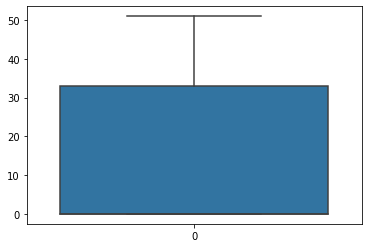

In [17]:
import seaborn as sns
sns.boxplot(data=df_income['industry_code'])

Occupation_code has no outlier

46

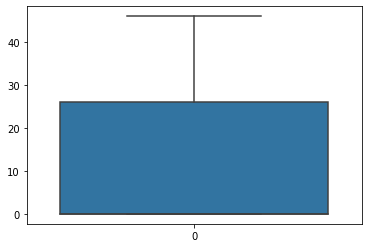

In [18]:
sns.boxplot(data=df_income['occupation_code'])
df_income['occupation_code'].max()

9999

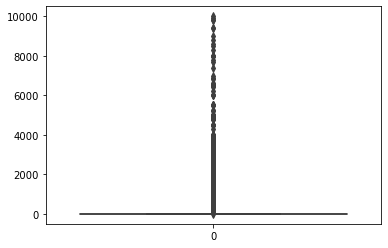

In [19]:
sns.boxplot(data=df_income['wage_per_hour'])
df_income['wage_per_hour'].max()

In [20]:
# upper=df_income['wage_per_hour'].mean()+3*df_income['wage_per_hour'].std()
# upper
import matplotlib.pyplot as plt
np.percentile(df_income['wage_per_hour'],[95,96,97,98,99,100])

array([ 495.,  600.,  800., 1000., 1400., 9999.])

Max value in 'num_person_Worked_employer': 6, 100 percentile'num_person_Worked_employer': 6.0


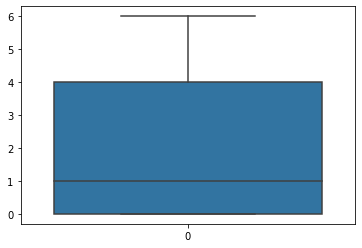

In [21]:

sns.boxplot(data=df_income['num_person_Worked_employer'])
print("Max value in 'num_person_Worked_employer': {}, 100 percentile'num_person_Worked_employer': {}".format(df_income['num_person_Worked_employer'].max(),np.percentile(df_income['num_person_Worked_employer'],100)))

Max value in 'num_person_Worked_employer': 6, 100 percentile'num_person_Worked_employer' 6.0


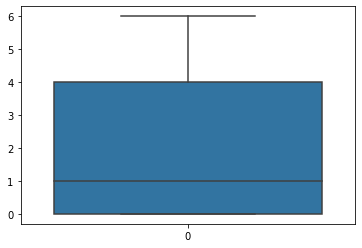

In [22]:

sns.boxplot(data=df_income['num_person_Worked_employer'])
print("Max value in 'num_person_Worked_employer': {}, 100 percentile'num_person_Worked_employer' {}".format(df_income['num_person_Worked_employer'].max(),np.percentile(df_income['num_person_Worked_employer'],100)))

In [23]:
# sns.boxplot(df_income['weeks_worked_in_year'])
print("max : {} ,100 pertile : {}".format(df_income['weeks_worked_in_year'].max(),np.percentile(df_income['weeks_worked_in_year'],100)))

max : 52 ,100 pertile : 52.0


In [45]:
for i in df_num:
    print("Max{} : {}, 100 percentile{} : {}" .format(df_num[i],df_num[i].max(),df_num[i],np.percentile(df_num[i],100)))

TypeError: list indices must be integers or slices, not str

In [24]:
print("max : {} ,100 pertile : {}".format(df_income['year'].max(),np.percentile(df_income['year'],100)))

max : 95 ,100 pertile : 95.0


In [26]:
df_num = df_income[df_income.select_dtypes(include=['int64','float64']).columns]
df_num.head()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,0,0,0,0,0,0,0,0,2,0,95,-50000
1,58,4,34,0,0,0,0,1,0,2,52,94,-50000
2,18,0,0,0,0,0,0,0,0,2,0,95,-50000
3,9,0,0,0,0,0,0,0,0,0,0,94,-50000
4,10,0,0,0,0,0,0,0,0,0,0,94,-50000


In [27]:
df_num.shape

(199523, 13)

In [28]:
df_non_num = df_income[df_income.select_dtypes(include='object').columns]
df_non_num.shape

(199523, 28)

In [29]:
for i in df_non_num:
    print(df_non_num[i].value_counts())

Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: class_of_worker, dtype: int64
High school graduate                      48407
Children                                  47422
Some college but no degree                27820
Bachelors degree(BA AB BS)                19865
7th and 8th grade                          8007
10th grade                                 7557
11th grade                                 6876
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6230
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
5th or 6th grade                           3277
12th grade no diplo

Not in universe    84054
No                  9987
Yes                 5786
Name: migration_sunbelt, dtype: int64
Not in universe           144232
Both parents present       38983
Mother only present        12772
Father only present         1883
Neither parent present      1653
Name: family_members_under_18, dtype: int64
United-States                   159163
Mexico                           10008
Puerto-Rico                       2680
Italy                             2212
Canada                            1380
Germany                           1356
Dominican-Republic                1290
Poland                            1212
Philippines                       1154
Cuba                              1125
El-Salvador                        982
China                              856
England                            793
Columbia                           614
India                              580
South Korea                        530
Ireland                            508
Jamaica        

In [30]:
df_income.shape
df_num.shape[1]+df_non_num.shape[1]

41

# Filling the missing value in 'hispanic_origin' with mode

In [32]:
df_null=df_income[df_income['hispanic_origin'].isnull()]
df_income['hispanic_origin'].mode(dropna=False)

0    All other
dtype: object

In [ ]:
'hispanic_origin'
'state_of_previous_residence',
 'migration_msa',
 'migration_reg',
 'migration_within_reg',
 'migration_sunbelt',
 'country_father',
 'country_mother',
 'country_self'

In [107]:
# df_income['migration_msa'].isnull().sum()/len(df_income)
df_income['migration_msa'].value_counts()
d=df_income[df_income['migration_msa'].isnull()]
# d['migration_msa'].sum()
df_income['migration_msa'].mode()

0    Nonmover
dtype: object

In [111]:
d=df_income[df_income['migration_reg'].isnull()]
# d['migration_msa'].sum()
print(df_income['migration_reg'].mode())
print(df_income['migration_reg'].isnull().sum()/df_income.shape[0])

0    Nonmover
dtype: object
0.4996717170451527


In [114]:
print(df_income['migration_within_reg'].mode())
print(df_income['migration_within_reg'].isnull().sum()/df_income.shape[0])

0    Nonmover
dtype: object
0.4996717170451527


In [35]:
print(df_income['migration_sunbelt'].mode())
print(df_income['migration_sunbelt'].isnull().sum()/df_income.shape[0])

0    Not in universe
dtype: object
0.4996717170451527


In [ ]:
print(df_income['migration_sunbelt'].mode())
print(df_income['migration_sunbelt'].isnull().sum()/df_income.shape[0])

In [36]:
print(df_income['country_father'].mode())
print(df_income['country_father'].isnull().sum()/df_income.shape[0])

0    United-States
dtype: object
0.03364524390671752


In [37]:
print(df_income['country_mother'].mode())
print(df_income['country_mother'].isnull().sum()/df_income.shape[0])

0    United-States
dtype: object
0.030668143522300687


In [38]:
print(df_income['country_self'].mode())
print(df_income['country_self'].isnull().sum()/df_income.shape[0])

0    United-States
dtype: object
0.017005558256441615


In [40]:
df_missing_columns=df_income[['hispanic_origin','state_of_previous_residence', 'migration_msa', 'migration_reg', 'migration_within_reg', 'migration_sunbelt', 'country_father', 'country_mother', 'country_self']]

In [55]:
# from sklearn.preprocessing  import Imputer
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy ='most_frequent')

df_missing_clean = imp.fit(df_missing_columns)
imp.transform(df_missing_columns)

array([['All other', 'Not in universe', 'Nonmover', ..., 'United-States',
        'United-States', 'United-States'],
       ['All other', 'Arkansas', 'MSA to MSA', ..., 'United-States',
        'United-States', 'United-States'],
       ['All other', 'Not in universe', 'Nonmover', ..., 'Vietnam',
        'Vietnam', 'Vietnam'],
       ...,
       ['All other', 'Not in universe', 'Nonmover', ..., 'Poland',
        'Poland', 'Germany'],
       ['All other', 'Not in universe', 'Nonmover', ..., 'United-States',
        'United-States', 'United-States'],
       ['All other', 'Not in universe', 'Nonmover', ..., 'United-States',
        'United-States', 'United-States']], dtype=object)

In [61]:
df_clean=pd.DataFrame(imp.transform(df_missing_columns),columns=df_missing_columns.columns)
df_clean.head()

,hispanic_origin,state_of_previous_residence,migration_msa,migration_reg,migration_within_reg,migration_sunbelt,country_father,country_mother,country_self
0,All other,Not in universe,Nonmover,Nonmover,Nonmover,Not in universe,United-States,United-States,United-States
1,All other,Arkansas,MSA to MSA,Same county,Same county,Yes,United-States,United-States,United-States
2,All other,Not in universe,Nonmover,Nonmover,Nonmover,Not in universe,Vietnam,Vietnam,Vietnam
3,All other,Not in universe,Nonmover,Nonmover,Nonmover,Not in universe,United-States,United-States,United-States
4,All other,Not in universe,Nonmover,Nonmover,Nonmover,Not in universe,United-States,United-States,United-States


In [63]:
df_clean.isnull().sum()

hispanic_origin                0
state_of_previous_residence    0
migration_msa                  0
migration_reg                  0
migration_within_reg           0
migration_sunbelt              0
country_father                 0
country_mother                 0
country_self                   0
dtype: int64

In [74]:
df_clean.shape

(199523, 9)

In [69]:
df_income_drop_missing= df_income.drop(['hispanic_origin','state_of_previous_residence', 'migration_msa', 'migration_reg', 'migration_within_reg', 'migration_sunbelt', 'country_father', 'country_mother', 'country_self'],axis=1)

In [75]:
# df_all_clean=df_income_drop_missing.append(df_clean)
# df_all_clean=pd.append( left_index=False, right_index=false, how='left')
df_all_clean=pd.concat([df_income_drop_missing, df_clean], axis=1)

In [76]:
df_all_clean.shape

(199523, 41)

In [77]:
df_all_clean.isnull().sum()

age                                 0
class_of_worker                     0
industry_code                       0
occupation_code                     0
education                           0
wage_per_hour                       0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
capital_gains                       0
capital_losses                      0
dividend_from_Stocks                0
tax_filer_status                    0
region_of_previous_residence        0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
num_person_Worked_employer          0
family_members_under_18             0
citizenship                         0
business_or_

In [78]:
df_all_clean.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672,-43794.199165
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001,24126.148404
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,-50000.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,-50000.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,-50000.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,-50000.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,50000.000000


In [70]:
df_income_drop_missing.shape

(199523, 32)

In [5]:
df_income.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

In [9]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               199523 non-null  int64 
 1   class_of_worker                   199523 non-null  object
 2   industry_code                     199523 non-null  int64 
 3   occupation_code                   199523 non-null  int64 
 4   education                         199523 non-null  object
 5   wage_per_hour                     199523 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       199523 non-null  object
 7   marital_status                    199523 non-null  object
 8   major_industry_code               199523 non-null  object
 9   major_occupation_code             199523 non-null  object
 10  race                              199523 non-null  object
 11  hispanic_origin                   198649 non-null  object
 12  se

In [10]:
df_income.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

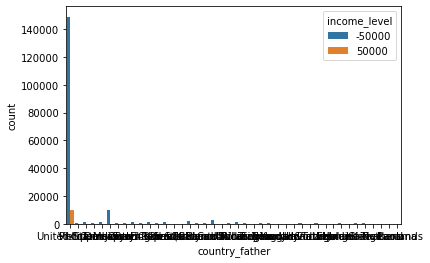

In [13]:
import seaborn as sns
sns.countplot(x='country_father',hue='income_level',data=df_income)

In [14]:
df_income['country_father'].value_counts()

United-States                   159163
Mexico                           10008
Puerto-Rico                       2680
Italy                             2212
Canada                            1380
Germany                           1356
Dominican-Republic                1290
Poland                            1212
Philippines                       1154
Cuba                              1125
El-Salvador                        982
China                              856
England                            793
Columbia                           614
India                              580
South Korea                        530
Ireland                            508
Jamaica                            463
Vietnam                            457
Guatemala                          445
Japan                              392
Portugal                           388
Ecuador                            379
Haiti                              351
Greece                             344
Peru                     

Selecting important columns

In [15]:
df_income_few=df_income[['age','class_of_worker','education','num_person_Worked_employer','country_father','wage_per_hour','tax_filer_status','marital_status','race','migration_within_reg','sex','capital_gains', 'capital_losses','occupation_code','citizenship','business_or_self_employed','veterans_benefits','member_of_labor_union','weeks_worked_in_year','income_level']]

In [16]:
df_income_few.head()

,age,class_of_worker,education,num_person_Worked_employer,country_father,wage_per_hour,tax_filer_status,marital_status,race,migration_within_reg,sex,capital_gains,capital_losses,occupation_code,citizenship,business_or_self_employed,veterans_benefits,member_of_labor_union,weeks_worked_in_year,income_level
0,73,Not in universe,High school graduate,0,United-States,0,Nonfiler,Widowed,White,NaN,Female,0,0,0,Native- Born in the United States,0,2,Not in universe,0,-50000
1,58,Self-employed-not incorporated,Some college but no degree,1,United-States,0,Head of household,Divorced,White,Same county,Male,0,0,34,Native- Born in the United States,0,2,Not in universe,52,-50000
2,18,Not in universe,10th grade,0,Vietnam,0,Nonfiler,Never married,Asian or Pacific Islander,NaN,Female,0,0,0,Foreign born- Not a citizen of U S,0,2,Not in universe,0,-50000
3,9,Not in universe,Children,0,United-States,0,Nonfiler,Never married,White,Nonmover,Female,0,0,0,Native- Born in the United States,0,0,Not in universe,0,-50000
4,10,Not in universe,Children,0,United-States,0,Nonfiler,Never married,White,Nonmover,Female,0,0,0,Native- Born in the United States,0,0,Not in universe,0,-50000


In [17]:
df_income_few.shape


(199523, 20)

In [18]:

df_income_few.columns

Index(['age', 'class_of_worker', 'education', 'num_person_Worked_employer',
       'country_father', 'wage_per_hour', 'tax_filer_status', 'marital_status',
       'race', 'migration_within_reg', 'sex', 'capital_gains',
       'capital_losses', 'occupation_code', 'citizenship',
       'business_or_self_employed', 'veterans_benefits',
       'member_of_labor_union', 'weeks_worked_in_year', 'income_level'],
      dtype='object')

In [19]:
df_income_few.shape

(199523, 20)

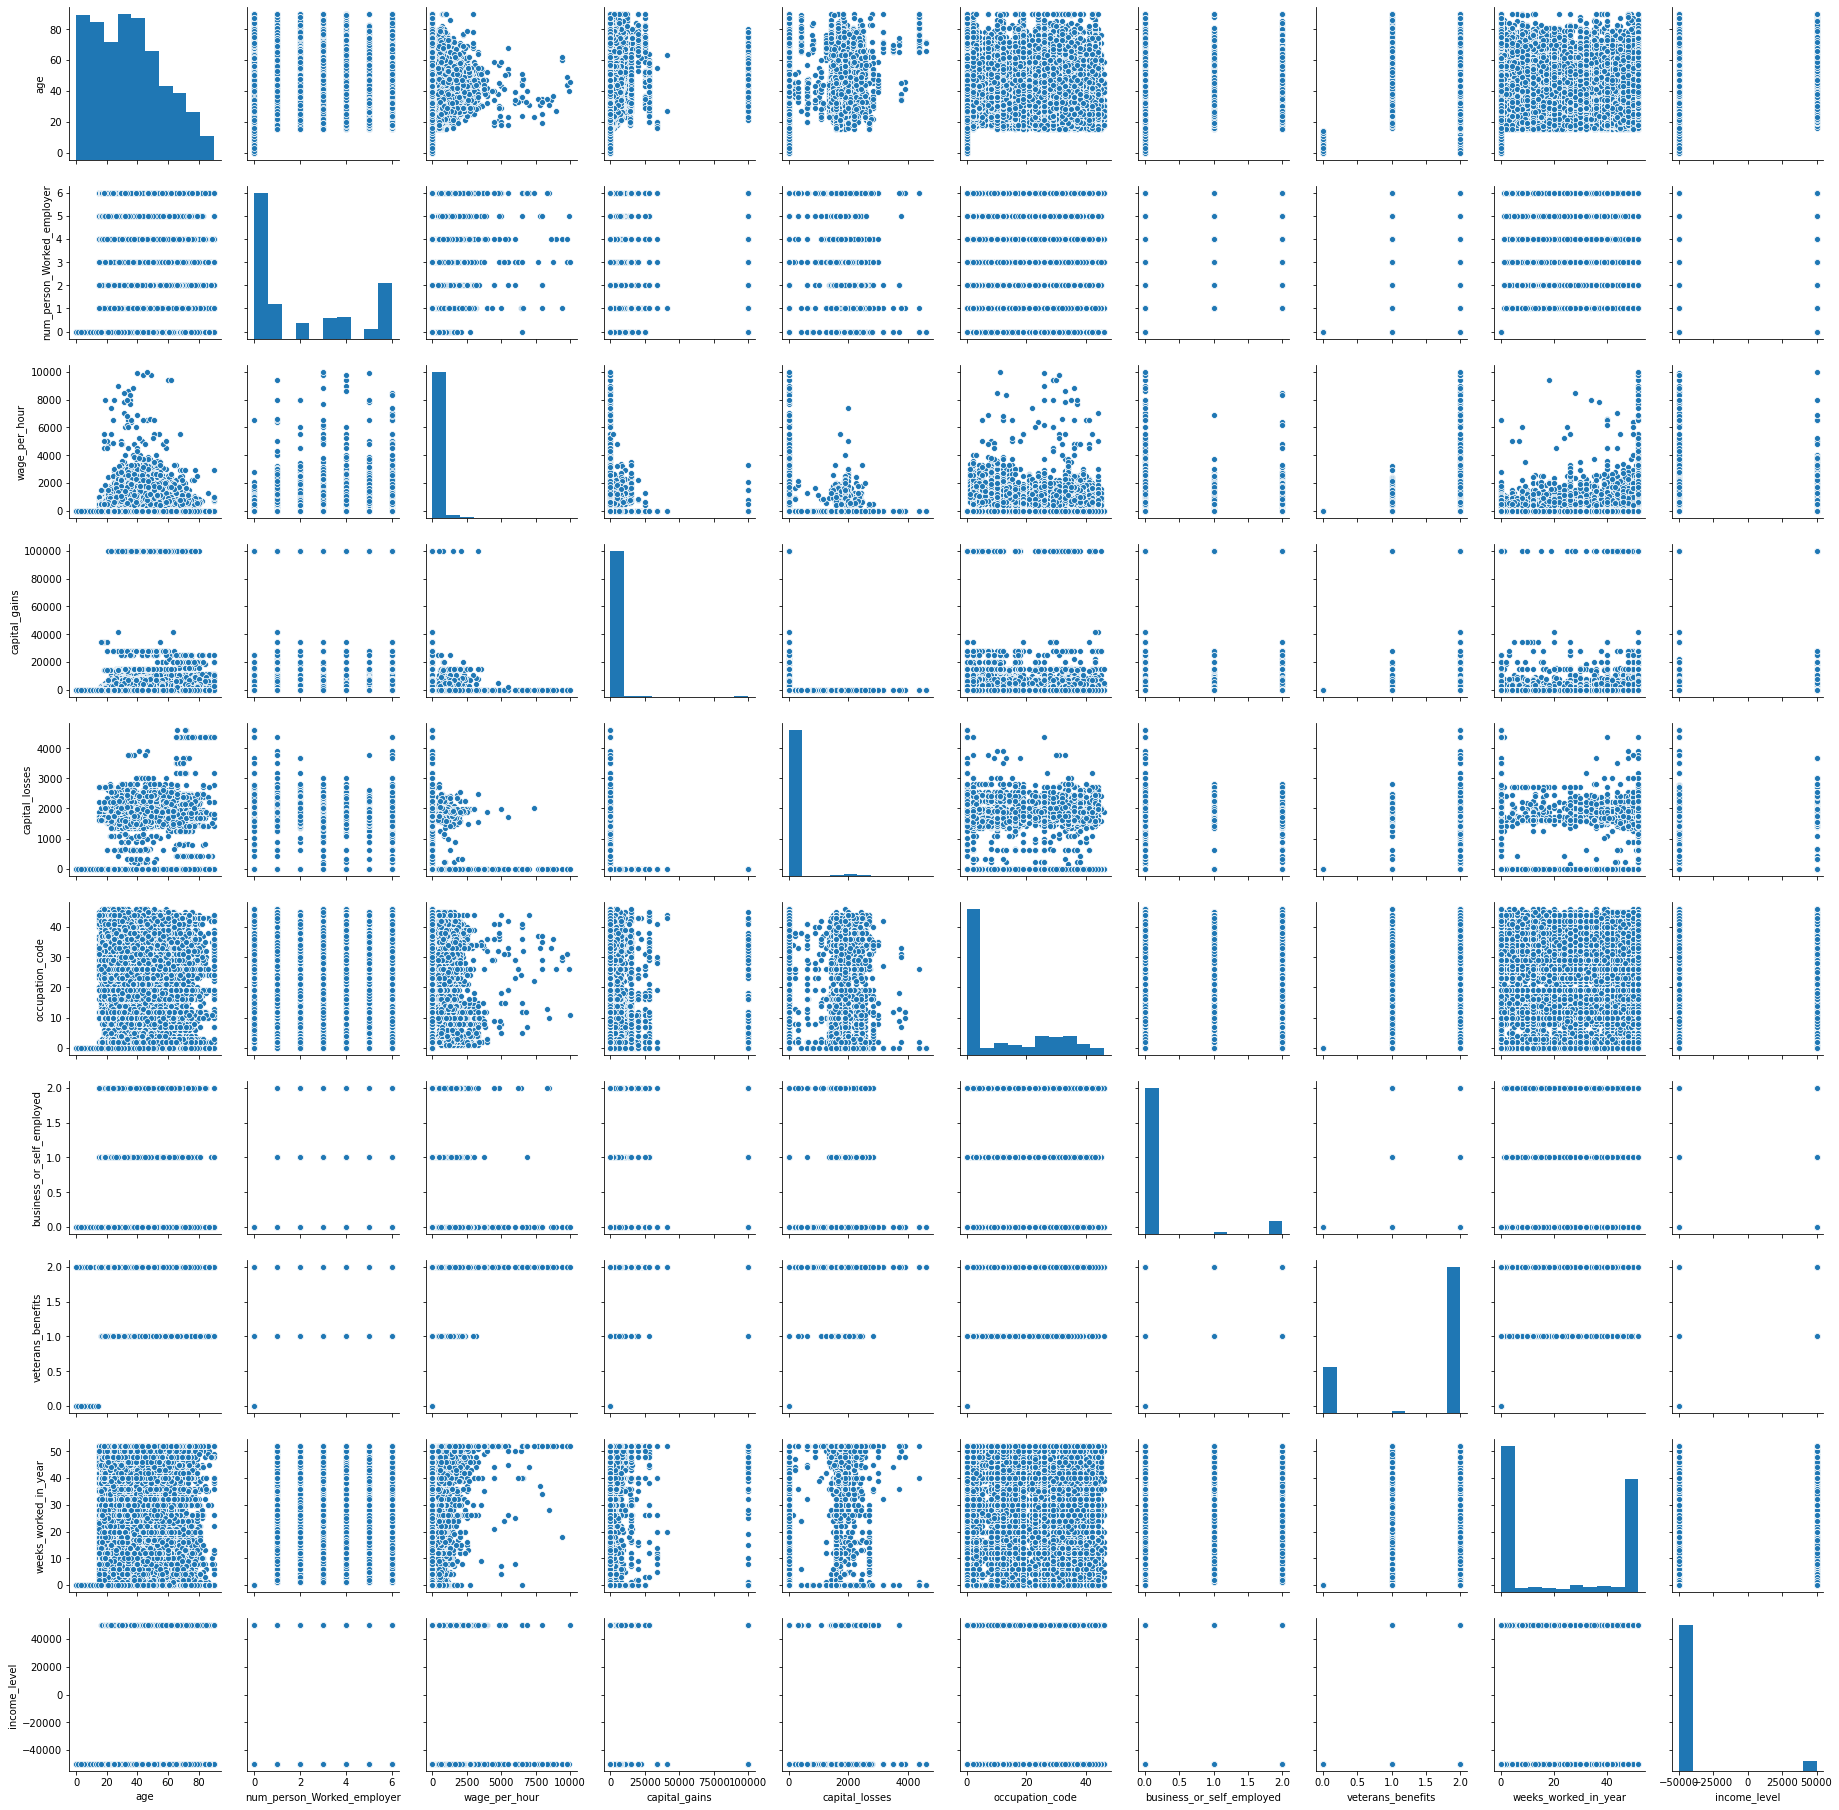

In [31]:
#corelation between columns
import seaborn as sns
sns.pairplot(df_income_few)

In [20]:
#numerical columns
df_income_few_num= df_income_few.select_dtypes(include=['int64', 'float64']).columns
print(df_income_few_num )
len(df_income_few_num)

Index(['age', 'num_person_Worked_employer', 'wage_per_hour', 'capital_gains',
       'capital_losses', 'occupation_code', 'business_or_self_employed',
       'veterans_benefits', 'weeks_worked_in_year', 'income_level'],
      dtype='object')


10

In [21]:
#non_numerical columns
df_income_few_non_num =df_income_few.select_dtypes(include=object).columns
print(df_income_few_non_num)
print(len(df_income_few_non_num))

Index(['class_of_worker', 'education', 'country_father', 'tax_filer_status',
       'marital_status', 'race', 'migration_within_reg', 'sex', 'citizenship',
       'member_of_labor_union'],
      dtype='object')
10


In [22]:
# Finding for missing values(a)
df_income_few.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   age                         199523 non-null  int64 
 1   class_of_worker             199523 non-null  object
 2   education                   199523 non-null  object
 3   num_person_Worked_employer  199523 non-null  int64 
 4   country_father              192810 non-null  object
 5   wage_per_hour               199523 non-null  int64 
 6   tax_filer_status            199523 non-null  object
 7   marital_status              199523 non-null  object
 8   race                        199523 non-null  object
 9   migration_within_reg        99827 non-null   object
 10  sex                         199523 non-null  object
 11  capital_gains               199523 non-null  int64 
 12  capital_losses              199523 non-null  int64 
 13  occupation_code             1

In [23]:
# Finding for type of num_data% in columns
num_data =df_income_few.select_dtypes(include=['int64','float64']).columns.tolist()
for data in num_data:
    print(df_income_few[data].value_counts(dropna=False)/df_income_few.shape[0],'\n')
    



34    0.017487
35    0.017291
36    0.016805
31    0.016795
33    0.016740
        ...   
85    0.002120
86    0.001744
87    0.001509
88    0.001208
89    0.000977
Name: age, Length: 91, dtype: float64 

0    0.481062
6    0.182991
1    0.115821
4    0.072067
3    0.067285
2    0.050526
5    0.030247
Name: num_person_Worked_employer, dtype: float64 

0       0.943345
500     0.003679
600     0.002737
700     0.002676
800     0.002541
          ...   
743     0.000005
584     0.000005
170     0.000005
1265    0.000005
2142    0.000005
Name: wage_per_hour, Length: 1240, dtype: float64 

0        0.963017
15024    0.003949
7688     0.003052
7298     0.002917
99999    0.001955
           ...   
2227     0.000005
4594     0.000005
2387     0.000005
1140     0.000005
2601     0.000005
Name: capital_gains, Length: 132, dtype: float64 

0       0.980423
1902    0.002040
1977    0.001910
1887    0.001824
1602    0.000967
          ...   
974     0.000010
155     0.000005
2080    0.000005
2519 

In [24]:
# Finding for type of non_num_data% in columns
num_data =df_income_few.select_dtypes(include=[object]).columns.tolist()
for data in num_data:
    print(df_income_few[data].value_counts(dropna=False)/df_income_few.shape[0],'\n')
    


Not in universe                   0.502423
Private                           0.361001
Self-employed-not incorporated    0.042326
Local government                  0.039013
State government                  0.021186
Self-employed-incorporated        0.016364
Federal government                0.014660
Never worked                      0.002200
Without pay                       0.000827
Name: class_of_worker, dtype: float64 

High school graduate                      0.242614
Children                                  0.237677
Some college but no degree                0.139433
Bachelors degree(BA AB BS)                0.099562
7th and 8th grade                         0.040131
10th grade                                0.037875
11th grade                                0.034462
Masters degree(MA MS MEng MEd MSW MBA)    0.032783
9th grade                                 0.031224
Associates degree-occup /vocational       0.026854
Associates degree-academic program        0.021867
5th or 6th g

In [25]:
#Meaning of 'Not in universe' (Not yet born)
df_ = df_income_few.groupby('migration_within_reg').age.agg(['min', 'max'])
df_


,min,max
migration_within_reg,,
Abroad,1,90
Different county same state,1,90
Different state in Midwest,1,90
Different state in Northeast,1,90
Different state in South,1,87
Different state in West,1,90
Nonmover,1,90
Not in universe,0,0
Same county,1,90


In [26]:
#Meaning of 'Not in universe' (Not yet born)
df_ = df_income_few.groupby('member_of_labor_union').age.agg(['min', 'max','mean','count'])
df_

,min,max,mean,count
member_of_labor_union,,,,
No,15,90,37.636148,16034
Not in universe,0,90,34.090697,180459
Yes,16,90,41.899340,3030


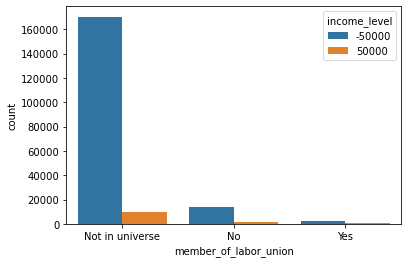

In [27]:
sns.countplot(x='member_of_labor_union',hue='income_level',data=df_income_few)

In [28]:
# Missing value percentage
miss_pct = df_income_few.isna().sum()/df_income_few.shape[0]
miss_pct

age                           0.000000
class_of_worker               0.000000
education                     0.000000
num_person_Worked_employer    0.000000
country_father                0.033645
wage_per_hour                 0.000000
tax_filer_status              0.000000
marital_status                0.000000
race                          0.000000
migration_within_reg          0.499672
sex                           0.000000
capital_gains                 0.000000
capital_losses                0.000000
occupation_code               0.000000
citizenship                   0.000000
business_or_self_employed     0.000000
veterans_benefits             0.000000
member_of_labor_union         0.000000
weeks_worked_in_year          0.000000
income_level                  0.000000
dtype: float64

In [48]:
dfff=df_income_few[df_income_few['migration_within_reg'].isna()]
dfff.head(4)

,age,class_of_worker,education,num_person_Worked_employer,country_father,wage_per_hour,tax_filer_status,marital_status,race,migration_within_reg,sex,capital_gains,capital_losses,occupation_code,citizenship,business_or_self_employed,veterans_benefits,member_of_labor_union,weeks_worked_in_year,income_level
0,73,Not in universe,High school graduate,0,United-States,0,Nonfiler,Widowed,White,NaN,Female,0,0,0,Native- Born in the United States,0,2,Not in universe,0,-50000
2,18,Not in universe,10th grade,0,Vietnam,0,Nonfiler,Never married,Asian or Pacific Islander,NaN,Female,0,0,0,Foreign born- Not a citizen of U S,0,2,Not in universe,0,-50000
5,48,Private,Some college but no degree,1,Philippines,1200,Joint both under 65,Married-civilian spouse present,Amer Indian Aleut or Eskimo,NaN,Female,0,0,10,Native- Born in the United States,2,2,No,52,-50000
7,28,Private,High school graduate,4,United-States,0,Single,Never married,White,NaN,Female,0,0,40,Native- Born in the United States,0,2,Not in universe,30,-50000


In [44]:
i.shape

(199523, 0)

In [34]:
df_income_few['migration_within_reg'].count()

99827

In [38]:
df_income['num_person_Worked_employer'].value_counts()

0    95983
6    36511
1    23109
4    14379
3    13425
2    10081
5     6035
Name: num_person_Worked_employer, dtype: int64

In [29]:
df_income_few.corr()

,age,num_person_Worked_employer,wage_per_hour,capital_gains,capital_losses,occupation_code,business_or_self_employed,veterans_benefits,weeks_worked_in_year,income_level
age,1.000000,0.140887,0.036938,0.053590,0.063351,0.117414,-0.002265,0.674844,0.206181,0.135720
num_person_Worked_employer,0.140887,1.000000,0.191543,0.058015,0.084255,0.515554,0.240553,0.463334,0.747302,0.222684
wage_per_hour,0.036938,0.191543,1.000000,-0.001082,0.010993,0.194498,0.054051,0.113094,0.195687,0.024528
capital_gains,0.053590,0.058015,-0.001082,1.000000,-0.012700,0.002534,0.015048,0.051530,0.083549,0.240725
capital_losses,0.063351,0.084255,0.010993,-0.012700,1.000000,0.043680,0.024116,0.075391,0.100762,0.147417
occupation_code,0.117414,0.515554,0.194498,0.002534,0.043680,1.000000,0.228952,0.438680,0.655613,0.013414
business_or_self_employed,-0.002265,0.240553,0.054051,0.015048,0.024116,0.228952,1.000000,0.177448,0.265872,0.040473
veterans_benefits,0.674844,0.463334,0.113094,0.051530,0.075391,0.438680,0.177448,1.000000,0.532279,0.140930
weeks_worked_in_year,0.206181,0.747302,0.195687,0.083549,0.100762,0.655613,0.265872,0.532279,1.000000,0.262316
income_level,0.135720,0.222684,0.024528,0.240725,0.147417,0.013414,0.040473,0.140930,0.262316,1.000000


In [18]:
df_income_num_cols.corr()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
age,1.000000,0.157822,0.117414,0.036938,0.053590,0.063351,0.104976,0.140887,-0.002265,0.674844,0.206181,0.004413,0.135720
industry_code,0.157822,1.000000,0.563493,0.165980,0.066017,0.072586,0.012774,0.642096,0.252694,0.476475,0.754472,0.003430,0.196190
occupation_code,0.117414,0.563493,1.000000,0.194498,0.002534,0.043680,-0.026726,0.515554,0.228952,0.438680,0.655613,-0.003140,0.013414
wage_per_hour,0.036938,0.165980,0.194498,1.000000,-0.001082,0.010993,-0.005731,0.191543,0.054051,0.113094,0.195687,0.002283,0.024528
capital_gains,0.053590,0.066017,0.002534,-0.001082,1.000000,-0.012700,0.131476,0.058015,0.015048,0.051530,0.083549,0.005243,0.240725
capital_losses,0.063351,0.072586,0.043680,0.010993,-0.012700,1.000000,0.042427,0.084255,0.024116,0.075391,0.100762,0.000096,0.147417
dividend_from_Stocks,0.104976,0.012774,-0.026726,-0.005731,0.131476,0.042427,1.000000,0.007206,-0.004885,0.054585,0.013823,0.001913,0.175779
num_person_Worked_employer,0.140887,0.642096,0.515554,0.191543,0.058015,0.084255,0.007206,1.000000,0.240553,0.463334,0.747302,0.018774,0.222684
business_or_self_employed,-0.002265,0.252694,0.228952,0.054051,0.015048,0.024116,-0.004885,0.240553,1.000000,0.177448,0.265872,0.007377,0.040473
veterans_benefits,0.674844,0.476475,0.438680,0.113094,0.051530,0.075391,0.054585,0.463334,0.177448,1.000000,0.532279,0.003122,0.140930


In [32]:
# import seaborn as sns
# sns.heatmap(df_income_few,annot=True,dropna=True)

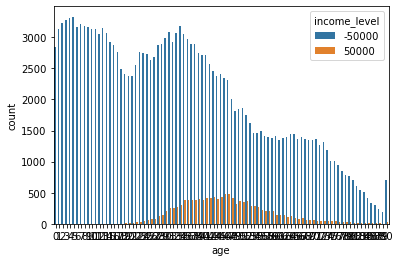

In [58]:
import matplotlib.pyplot as plt
colum = df_income_few.select_dtypes(include=['int64','float64']).columns.tolist()
import seaborn as sns

sns.countplot(x='age',hue='income_level',data=df_income_few)

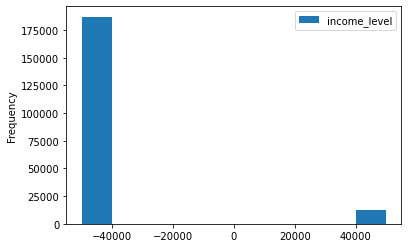

In [63]:
df_income_few.plot( x='age', y='income_level', kind='hist')
plt.show()

[[]]

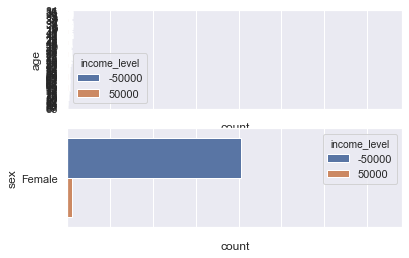

In [71]:
# sns.countplot(x=['age','sex'],hue='income_level',data=df_income_few)
sns.set(style="darkgrid")
fig, ax =plt.subplots(2,1)
max_count = max([max(df_income_few[i].value_counts()) for i in df_income_few.columns])
A=sns.countplot(y='age',hue='income_level',data=df_income_few,ax=ax[0],order=df_income_few.age.value_counts().iloc[:90].index)
B=sns.countplot(y='sex',hue='income_level',data=df_income_few,ax=ax[1],order=df_income_few.sex.value_counts().iloc[:1].index)
# C=sns.countplot(y=df['C'],ax=ax[2],order=df.C.value_counts().iloc[:2].index)
ax[0].set_xlim(0,max_count)
ax[1].set_xlim(0,max_count)
# ax[2].set_xlim(0,max_count)
A.set(xticklabels=[])
B.set(xticklabels=[])

In [ ]:
sns.swarmplot(x='age',y='sex',hue='income_level',data=df_income_few)